<a href="https://colab.research.google.com/github/PragyaGupta2912/AI_Labs/blob/main/4_BFS_DFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###BFS 
Finding shortest path in an unweighted graph (Dijkstra's algorithm

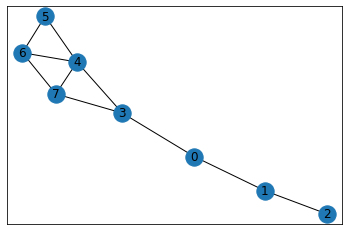

Shortest path length is : 3
Path is : : 
0 3 4 5 

In [6]:
import networkx as nx 
import matplotlib.pyplot as plt  
class GraphVisualization: 
  def __init__(self): 
    self.visual = [] 
 
  def addEdge(self, a, b): 
    temp = [a, b] 
    self.visual.append(temp) 
          
    
  def visualize(self): 
    G = nx.Graph() 
    G.add_edges_from(self.visual) 
    nx.draw_networkx(G) 
    plt.show()  
G = GraphVisualization() 
G.addEdge(0, 1) 
G.addEdge(0, 3) 
G.addEdge(1, 2) 
G.addEdge(3, 4) 
G.addEdge(3, 7) 
G.addEdge(4, 5)
G.addEdge(4, 6) 
G.addEdge(4, 7) 
G.addEdge(5, 6)
G.addEdge(6, 7)   
G.visualize() 

def add_edge(adj, src, dest):
  adj[src].append(dest);
  adj[dest].append(src);
def BFS(adj, src, dest, v, pred, dist):
  queue = []
  visited = [False for i in range(v)];
  for i in range(v):
    dist[i] = 1000000
    pred[i] = -1;
    
  visited[src] = True;
  dist[src] = 0;
  queue.append(src);
  
  while (len(queue) != 0):
    u = queue[0];
    queue.pop(0);
    for i in range(len(adj[u])):
      if (visited[adj[u][i]] == False):
        visited[adj[u][i]] = True;
        dist[adj[u][i]] = dist[u] + 1;
        pred[adj[u][i]] = u;
        queue.append(adj[u][i]);
  
               
        if (adj[u][i] == dest):
          return True;
  return False;
def printShortestDistance(adj, s, dest, v):
  pred=[0 for i in range(v)]
  dist=[0 for i in range(v)];
  
  if (BFS(adj, s, dest, v, pred, dist) == False):
    print("Given source and destination are not connected")
  
 
  path = []
  crawl = dest;
  crawl = dest;
  path.append(crawl);
     
  while (pred[crawl] != -1):
    path.append(pred[crawl]);
    crawl = pred[crawl];
  print("Shortest path length is : " + str(dist[dest]), end = '')
  print("\nPath is : : ")
  for i in range(len(path)-1, -1, -1):
    print(path[i], end=' ')
         
 
if __name__=='__main__':
  v = 8;
  
  adj = [[] for i in range(v)];
  
   
  add_edge(adj, 0, 1);
  add_edge(adj, 0, 3);
  add_edge(adj, 1, 2);
  add_edge(adj, 3, 4);
  add_edge(adj, 3, 7);
  add_edge(adj, 4, 5);
  add_edge(adj, 4, 6);
  add_edge(adj, 4, 7);
  add_edge(adj, 5, 6);
  add_edge(adj, 6, 7);
  source = 0
  dest = 5;
  printShortestDistance(adj, source, dest, v);



### DFS
1)       Island Problem: Group the 1’s in an adjacency matrix which indicates that the grouped elements constitute the land mass (1’s) and the ungrouped elements (0’s) constitute of water mass. 

In [4]:
class Solution(object):
   def numIslands(self, grid):
      if len(grid) == 0:
         return 0
      n= len(grid)
      m = len(grid[0])
      ans = 0
      for i in range(n):
         for j in range(m):
            if grid[i][j] == "1":
               ans+=1
            self.make_water(i,j,n,m,grid)
      return ans
   def make_water(self,i,j,n,m,grid):
      if i<0 or j<0 or i>=n or j>=m:
         return
      if grid[i][j] == "0":
         return
      else:
         grid[i][j]="0"
      self.make_water(i+1,j,n,m,grid)
      self.make_water(i,j+1,n,m,grid)
      self.make_water(i-1,j,n,m,grid)
      self.make_water(i,j-1,n,m,grid)
ob1 = Solution()
print(ob1.numIslands([["1","0","1","0","1"],["1","1","1","0","1"],["0","1","0","0","1"],
["1","0","0","1","0"]]))

4


2) Topological sorting: If we want to perform a scheduling operation from such a set of tasks, we have to ensure that the dependency relation is not violated i.e, any task that comes later in a chain of tasks is always performed only after all the tasks before it has finished.


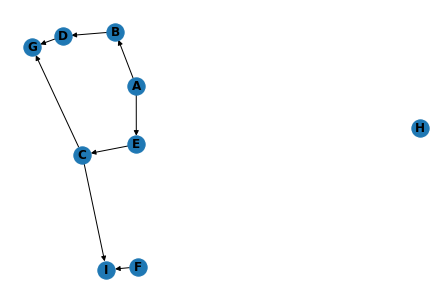

pushing D
pushing B
pushing C
pushing E
pushing A
pushing F
Topological sorted:
H F A E C I B D G 

In [5]:
import networkx as nx
dag = nx.digraph.DiGraph()
dag.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
dag.add_edges_from([('A', 'B'), ('A', 'E'), ('B', 'D'), ('E', 'C'),
                      ('D', 'G'),('C', 'G'),('C', 'I'), ('F', 'I')])

import matplotlib.pyplot as plt
nx.draw(dag, with_labels=True, font_weight='bold')
plt.show()

def dfs(dag, start, visited, stack):
  if start in visited:
    return stack, visited
  if dag.out_degree(start) == 0:
    stack.append(start)
    visited.append(start)
    return stack, visited
  for node in dag.neighbors(start):
    if node in visited:
      continue
    stack, visited = dfs(dag, node, visited, stack)
  if start not in visited:
    print("pushing %s"%start)
    stack.append(start)
    visited.append(start)
  return stack, visited

def topological_sort_using_dfs(dag):
  visited = []
  stack=[]
  start_nodes = [i for i in dag.nodes if dag.in_degree(i)==0]
  for s in start_nodes:
    stack, visited = dfs(dag, s, visited, stack)
  print("Topological sorted:")
  while(len(stack)!=0):
    print(stack.pop(), end=" ")
topological_sort_using_dfs(dag)